<a href="https://colab.research.google.com/github/jungddddd/ML-/blob/main/1)%ED%85%8D%EC%8A%A4%ED%8A%B8_%EA%B0%80%EA%B3%B501_int%2C_onehot%2C_bow%2C_tdm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 정수인코딩

In [ ]:
# 토큰화를 위한 nltk 모듈 불러오기
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

```
text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

```

In [ ]:
# text 선언

text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."


In [ ]:
# 문장 토큰화
# nltk.tokenize 의 sent_tokenize 불러와 사용
# sent_tokenize 함수를 이용해 text를 문장단위로 토큰화하여 text 변수에 할당
# .(마침표), !(느낌표)를 기준으로 토큰화 된 결과 확인
from nltk.tokenize import sent_tokenize

text = sent_tokenize(text)
print(text)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [ ]:
len(text)

11

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 단어 토큰화
# 필요한 모듈 불러오기
# nltk.tokenize 의 word_tokenize 불러오기
# nltk.corpus 의 stopwords 불러오기
# collections 의 Counter 불러오기
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
# 단어 토큰화
# Counter 함수를 이용해 단어의 빈도를 계산하여 vocab 변수에 할당하도록 지정
# sentences 변수에 리스트 할당
# stopwords의 words 함수에 english 를 지정해 영어 불용어를 stop_words 변수에 할당
vocab = Counter() # 파이썬의 Counter 모듈을 이용하면 단어의 모든 빈도를 쉽게 계산할 수 있음

sentences = []
stop_words = set(stopwords.words('english'))

In [ ]:
# 단어 토큰화
# 반복문으로 text 를 word_tokenize() 함수를 이용해 단어 토큰화 수행하여 sentence 변수에 할당
# 토큰화된 단어를 lower() 함수로 모든 단어를 소문자로 변경하여 단어의 개수를 줄여 word 변수에 할당
# 단어 토큰화 된 결과에 대해 불용어 제거
# 그리고 단어 길이가 2 이하인 경우 제거
# 불용어가 아니고, 단어길이가 2 초과인 단어는 result 리스트에 추가
# vocab 으로 각 단어의 빈도를 count해줌
# sentences 리스트에 result를 추가
# 문장 별로 단어 토큰화 결과가 리스트로 묶어서 출력됨
for i in text:
    sentence = word_tokenize(i) # 단어 토큰화를 수행

    result = []

    for word in sentence:
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수 줄임
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어 제거
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어 제거
                result.append(word)
                vocab[word] = vocab[word]+1 #각 단어의 빈도를 Count
    sentences.append(result)

print(sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [ ]:
# vocab 으로 각 단어별로 계산된 빈도 확인
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [ ]:
# vocab에 items() 함수를 적용하여 key와 value를 모두 출력
# sorted 함수에 reverse 파라미터를 True 로 지정하여 x[1](value)를 기준으로 내림차순 정리
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [ ]:
# 정수 인코딩
# word_to_index 로 딕셔너리 할당
# 빈도순으로 정렬된 vocab_sorted 에서 단어와 빈도를 각각 word, frequency 로 할당
# 빈도가 한번으로 적은 단어는 제외하고 1번부터 번호를 붙여줌
word_to_index = {}
i = 0

for (word, frequency) in vocab_sorted : #barber, 8 / secret, 6
     if frequency > 1 : # 정제(Cleaning) 챕터에서 언급했듯이 빈도수가 적은 단어는 제외
        i = i+1  #i=1, #i=2
        word_to_index[word] = i  #barber : 1, secret : 2
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


## one-hot encoding

In [ ]:
# 한글 토큰화를 위해 konlpy 설치
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 38.7 MB/s eta 0:00:00


```
example = "이 여름 다시 한번 설레고 싶다 그때 그 여름을 틀어줘 그 여름을 들려줘 이 여름도 언젠가는 그해 여름 오늘이 가장 젊은 내 여름"
```

In [ ]:
# example 선언
example = "이 여름 다시 한번 설레고 싶다 그때 그 여름을 틀어줘 그 여름을 들려줘 이 여름도 언젠가는 그해 여름 오늘이 가장 젊은 내 여름"

In [ ]:
# 한국어 형태소 분석을 위한 konlpy 의 Okt 분석기 불러오기
# okt 분석기의 morphs 함수를 이용해 형태소를 추출하여 token 변수에 할당
from konlpy.tag import Okt
okt = Okt()

token = okt.morphs(example)

print(token)

['이', '여름', '다시', '한번', '설레고', '싶다', '그때', '그', '여름', '을', '틀어줘', '그', '여름', '을', '들려줘', '이', '여름', '도', '언젠가', '는', '그해', '여름', '오늘이', '가장', '젊은', '내', '여름']


In [ ]:
# 정수 인코딩
# word_to_index 로 딕셔너리 할당
# word_to_index 에 key에 없는 단어라면 그 단어의 value 를 word_to_index 딕셔너리의 요소 개수로 지정
word_to_index={}

for voca in token: #이, 여름
     if voca not in word_to_index.keys(): #이 : 0, 여름 : 1
            word_to_index[voca]=len(word_to_index)

print(word_to_index)

{'이': 0, '여름': 1, '다시': 2, '한번': 3, '설레고': 4, '싶다': 5, '그때': 6, '그': 7, '을': 8, '틀어줘': 9, '들려줘': 10, '도': 11, '언젠가': 12, '는': 13, '그해': 14, '오늘이': 15, '가장': 16, '젊은': 17, '내': 18}


In [ ]:
# one_hot_encoding() 함수 정의
# word_to_index 길이만큼 0이 할당된 리스트를 one_hot_vector로 지정
# word_to_index 의 단어(key)에 대응된 value 를 index 로 지정
# one_hot_vector의 index 값의 위치에 1을 업데이트 해서 단어의 one hot 벡터 생성
def one_hot_encoding(word, word_to_index):
    one_hot_vector = [0]*(len(word_to_index)) #[0,0,0,...,0,0]
    index = word_to_index[word] #"여름" : 1 -> index
    one_hot_vector[index] = 1  #[0,1,0,0,0,0,0,...,0]
    return one_hot_vector

In [ ]:
# 정의한 one_hot_encoding() 함수를 이용해 one hot vector 확인
one_hot_encoding("여름", word_to_index)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# 정의한 one_hot_encoding() 함수를 이용해 one hot vector 확인
one_hot_encoding("가장", word_to_index)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

### < 과제 >

In [ ]:
from collections import Counter
vocab = Counter()

for word in token:
    voca = []
    if len(word) > 1:        # 단어 길이가 1인 경우 제외
        voca.append(word)
        vocab[word]=vocab[word]+1 #각 단어의 빈도 count


print(vocab)

In [ ]:
vocab_sorted=sorted(vocab.items(), key=lambda x:x[1], reverse=True)
print(vocab_sorted)

In [ ]:
word_to_index={}
i = 0

for (word, frequency) in vocab_sorted :
    word_to_index[word]=i
    i=i+1

print(word_to_index)

In [ ]:
one_hot_encoding("젊은", word_to_index)

## BoW

```
text = "이 여름 다시 한번 설레고 싶다. 그때 그 여름을 틀어줘. 그 여름을 들려줘. 이 여름도 언젠가는 그해 여름. 오늘이 가장 젊은 내 여름."
```

In [ ]:
# text 선언
text = "이 여름 다시 한번 설레고 싶다. 그때 그 여름을 틀어줘. 그 여름을 들려줘. 이 여름도 언젠가는 그해 여름. 오늘이 가장 젊은 내 여름."

In [ ]:
# 한국어 형태소 분석을 위한 konlpy 의 Okt 분석기 불러오기
# 정규표현식 사용을 위해 re 모듈 불러오기
from konlpy.tag import Okt
import re

okt = Okt()

In [ ]:
# 정규표현식을 통해 온점을 제거하여 token 변수에 할당
token = re.sub("(\.)","",text)

print(token)

이 여름 다시 한번 설레고 싶다 그때 그 여름을 틀어줘 그 여름을 들려줘 이 여름도 언젠가는 그해 여름 오늘이 가장 젊은 내 여름


In [ ]:
# okt 분석기의 morphs 함수를 이용해 형태소를 추출하여 token 변수에 할당
token = okt.morphs(token)

print(token)

['이', '여름', '다시', '한번', '설레고', '싶다', '그때', '그', '여름', '을', '틀어줘', '그', '여름', '을', '들려줘', '이', '여름', '도', '언젠가', '는', '그해', '여름', '오늘이', '가장', '젊은', '내', '여름']


In [ ]:
# 정수 인코딩
# word2index 로 딕셔너리 할당, bow 로 리스트 할당
# (if) word2index 에 key에 없는 단어라면 그 단어의 value 를 word2index 딕셔너리의 요소 개수로 지정
# 그리고 bow 에 insert 함수를 이용해 모두 1로 기본값 지정
# (else) word2index 에 있는 단어라면 해당 단어의 인덱스 값에 1을 더해줌
word2index={}
bow=[]

for voca in token: #이
    if voca not in word2index.keys():
        word2index[voca] = len(word2index) #이:0
               # token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고,
               # 이미 있는 단어는 넘김
        bow.insert(len(word2index)-1,1)  # BoW 전체에 전부 기본값 1 지정 #(1-1, 1)=(0, 1)

    else:
        index = word2index.get(voca) # 재등장하는 단어의 인덱스 #0
        bow[index] = bow[index]+1 # 재등장한 단어의 해당 인덱스에 1을 더함 #[0] +1

print(word2index)

{'이': 0, '여름': 1, '다시': 2, '한번': 3, '설레고': 4, '싶다': 5, '그때': 6, '그': 7, '을': 8, '틀어줘': 9, '들려줘': 10, '도': 11, '언젠가': 12, '는': 13, '그해': 14, '오늘이': 15, '가장': 16, '젊은': 17, '내': 18}


In [ ]:
# bow 확인
print(bow)

[2, 6, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# 사이킷런을 이용해 BoW 만들기
# sklearn.feature_extraction.text 모듈의 CountVectorizer 함수 불러오기
# CountVectorizer : 단어의 빈도를 Count하여 Vector로 만들어줌
# corpus를 리스트로 할당
# fit_transform 함수로 corpus 데이터를 변경해 array 로 변환하여 corpus 에서 각 단어의 빈도 수를 기록
# vocabulary_ 로 각 단어의 인덱스 확인
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수 기록
print(vector.vocabulary_) # 각 단어의 인덱스 확인

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


- you와 love는 두 번씩 언급되었으므로 각각 인덱스 2와 인덱스 4에서 2의 값을 가지며,그 외의 값에서는 1의 값을 가지는 것을 볼 수 있음

- CountVectorizer가 기본적으로 길이가 2이상인 문자에 대해서만 토큰으로 인식하기 때문에 알파벳 I는 BoW를 만드는 과정에서 제외됨

In [ ]:
# fit_transform 을 적용한 결과 확인
print(vector.fit_transform(corpus))

  (0, 4)	2
  (0, 1)	1
  (0, 3)	1
  (0, 5)	1
  (0, 2)	2
  (0, 0)	1


In [ ]:
# sklearn.feature_extraction.text 모듈의 CountVectorizer 함수 불러오기
# CountVectorizer : 단어의 빈도를 Count하여 Vector로 만들어줌
# CountVectorizer에 stop_words를 리스트로 불용어 지정
# fit_transform 함수로 corpus 데이터를 변경해 array 로 변환하여 corpus 에서 각 단어의 빈도 수를 기록
# vocabulary_ 로 각 단어의 인덱스 확인
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer(stop_words=["you", "your"])

print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[1 1 2 1]]
{'know': 1, 'want': 3, 'love': 2, 'because': 0}


In [ ]:
# sklearn.feature_extraction.text 모듈의 CountVectorizer 함수 불러오기
# nltk.corpus 의 stopwords 불러오기
# stopwords의 words 함수에 english 를 지정해 영어 불용어를 sw 변수에 할당
# CountVectorizer에 sw를 리스트로 불용어 지정
# fit_transform 함수로 corpus 데이터를 변경해 array 로 변환하여 corpus 에서 각 단어의 빈도 수를 기록
# vocabulary_ 로 각 단어의 인덱스 확인
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

sw = stopwords.words("english")

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer(stop_words = sw)

print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[1 2 1]]
{'know': 0, 'want': 2, 'love': 1}


## TDM

In [ ]:
# 사이킷런을 이용하여 TDM 생성
# sklearn.feature_extraction.text 모듈의 CountVectorizer 함수 불러오기
# fit_transform 함수로 corpus 데이터를 변경해 array 로 변환하여 corpus 에서 각 단어의 빈도 수를 기록
# vocabulary_ 로 각 단어의 인덱스 확인
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love',
          'I like you',
          'what should I do']

vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수 기록
print(vector.vocabulary_) # 각 단어의 인덱스 확인

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


### 폭염데이터

In [ ]:
# pandas 모듈 불러오기
# 구분자는 ,(콤마), quotechar는 "(큰따옴표)",  error_bad_lines 을 False 로 지정하여 오류가 발생한 줄을 빼고 처리하도록 함
# warn_bad_lines 를 False로 하면 경고도 보여주지 않음
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Bigdata_ML/III.빅데이터_분석을 _위한_파이썬_기반_머신러닝/3.텍스트/폭염.csv',
                 sep=',', quotechar='"',
                 error_bad_lines=False, warn_bad_lines=False, encoding='utf-8')
df.head()

<ipython-input-1-d69994909706>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/Bigdata_ML/III.빅데이터_분석을 _위한_파이썬_기반_머신러닝/3.텍스트/폭염.csv',
<ipython-input-1-d69994909706>:6: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/Bigdata_ML/III.빅데이터_분석을 _위한_파이썬_기반_머신러닝/3.텍스트/폭염.csv',


,주소,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,개체명(인물),개체명(지역),개체명(기업/기관),키워드,특성추출,본문,원본주소
0,http://www.bigkinds.or.kr/news/newsDetailView....,20180724,헤럴드경제,김유진 기자,[펄펄 끓는 한반도] 최고기온 40도 시간문제…,사회>날씨,NaN,NaN,NaN,NaN,NaN,NaN,"경북, 경북 경산, 경상북도, 금락리, 대구, 북태평양, 신녕면, 하양읍, 한반도,...","경산시, 경주, 기상청, 대구, 영천시, 한반도","시간문제,최고기온,경북,경산,8월,기록,대구,7말,열축적,가속,7말,더위,절정,열흘...","가능성,40도,기상청,대구,최고기온,고기압,경상북도,열축적,경북,시간문제,북태평양,...",23일 경북 경산 39.9도까지 치솟아 1942년 8월1일 대구 40.0도 기..열...,http://biz.heraldcorp.com/view.php?ud=20180724...
1,http://www.bigkinds.or.kr/news/newsDetailView....,20180724,헤럴드경제,박로명 기자,붙이는 네일·인스턴트 타투…폭염에도 ‘반짝 뷰티템’ 인기,경제>유통,경제>서비스_쇼핑,경제>산업_기업,NaN,NaN,NaN,롭스,인디아,"H&B, 네일아트, 데싱디바, 롭스, 롯데, 헬스앤뷰티","네일,인스턴트,타투,폭염,뷰티템,인기,롭스,네일,염모제,매출,52%·31%,양보,전...","롭스,2주,휴가철,올리브영,염모제,타투스티커,연평균,네일숍,데싱디바,120ml,5만...","롭스, 네일·염모제 매출 각각 52%·31% ↑ “아무리 더워도 아름다움 양보 못해...",http://biz.heraldcorp.com/view.php?ud=20180724...
2,http://www.bigkinds.or.kr/news/newsDetailView....,20180724,서울경제,김도건 기자,"천기누설! ‘수익의 법칙’ 업종별 순환매를 알았다면….제약바이오, 경협, 전기차 상관관계",경제>증권_증시,경제>산업_기업,경제>금융_재테크,NaN,NaN,NaN,NaN,"대장주, 서울경, 수혜주","제약바이오, 제천대성, 중국, 창성바이오","천기누설,수익,법칙,업종별,순환매,제약바이오,경협,전기차,상관관계,중국,창성,바이오...","톡스타,순환매,제약바이오,전기차,경협주,전문가,서울경제,중국,설리,가능성,전문가들,...",중국의 창성바이오가 가짜백신으로 상장폐지 위기. 국내 제약바이오주들도 덩달아 급락....,http://www.sedaily.com/NewsView/1S27K8I4H4
3,http://www.bigkinds.or.kr/news/newsDetailView....,20180724,서울경제,김도건 기자,"천기누설! ‘수익의 법칙’ 업종별 순환매를 알았다면….제약바이오, 경협, 전기차 상관관계",경제>증권_증시,경제>산업_기업,경제>금융_재테크,NaN,NaN,NaN,NaN,"대장주, 서울경, 수혜주","제약바이오, 제천대성, 중국, 창성바이오","천기누설,수익,법칙,업종별,순환매,제약바이오,경협,전기차,상관관계,중국,창성,바이오...","톡스타,순환매,제약바이오,전기차,경협주,전문가,서울경제,중국,설리,가능성,전문가들,...",중국의 창성바이오가 가짜백신으로 상장폐지 위기. 국내 제약바이오주들도 덩달아 급락....,http://www.sedaily.com/NewsView/1S27KI9O3X
4,http://www.bigkinds.or.kr/news/newsDetailView....,20180724,파이낸셜뉴스,파이낸셜뉴스,[fn사설] 탄소 배출 후진국으로 추락한 한국,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"한반도, 독일, 고위도, 캐나다, 미국, 스웨덴, 일본, 수정안, 한국","환경부, 미국, OECD, 지난해, 글로벌, 서울, 회원국, 경제협력개발기구, 행정부","후진국,탄소,배출,추락,한국,OECD,주요국,역행,탈원전,상황,악화,우리나라,이산화...","온실가스,배출량,탈원전,한국,oecd,미국,사망자,온난화,발전량,후진국,8차,서울,...",OECD 주요국과 역행.. 탈원전이 상황 악화시켜 지난해 우리나라 이산화...,http://www.fnnews.com/news/201807231714237258


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# shape 로 데이터 형태 확인
# 4924행, 18 열로 구성
df.shape

(4924, 18)

In [ ]:
# info() : 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4924 entries, 0 to 4923
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   주소          4924 non-null   object
 1   일자          4924 non-null   int64 
 2   언론사         4924 non-null   object
 3   기고자         4227 non-null   object
 4   제목          4924 non-null   object
 5   통합 분류1      4727 non-null   object
 6   통합 분류2      3001 non-null   object
 7   통합 분류3      1620 non-null   object
 8   사건/사고 분류1   1898 non-null   object
 9   사건/사고 분류2   402 non-null    object
 10  사건/사고 분류3   75 non-null     object
 11  개체명(인물)     2056 non-null   object
 12  개체명(지역)     4217 non-null   object
 13  개체명(기업/기관)  4537 non-null   object
 14  키워드         4924 non-null   object
 15  특성추출        4924 non-null   object
 16  본문          4924 non-null   object
 17  원본주소        4697 non-null   object
dtypes: int64(1), object(17)
memory usage: 692.6+ KB


In [ ]:
# columns : 컬럼명 확인
df.columns

Index(['주소', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '개체명(인물)', '개체명(지역)',
       '개체명(기업/기관)', '키워드', '특성추출', '본문', '원본주소'],
      dtype='object')

In [ ]:
# head() 함수를 이용해 '본문' 컬럼만 확인
df['본문'].head()

0    23일 경북 경산 39.9도까지 치솟아 1942년 8월1일 대구 40.0도 기..열...
1    롭스, 네일·염모제 매출 각각 52%·31% ↑ “아무리 더워도 아름다움 양보 못해...
2    중국의 창성바이오가 가짜백신으로 상장폐지 위기. 국내 제약바이오주들도 덩달아 급락....
3    중국의 창성바이오가 가짜백신으로 상장폐지 위기. 국내 제약바이오주들도 덩달아 급락....
4    OECD 주요국과 역행.. 탈원전이 상황 악화시켜       지난해 우리나라 이산화...
Name: 본문, dtype: object

In [ ]:
# 한국어 형태소 분석을 위한 konlpy 의 Okt 분석기 불러오기
# 정규표현식 사용을 위해 re 모듈 불러오기
from konlpy.tag import Okt
import re

okt = Okt()  # Okt 형태소 분석기를 불러 okt 에 저장한다.

#### 명사 추출 함수 만들기

In [ ]:
# okt 분석기의 nouns 함수로 명사 추출
okt.nouns('아침에 해를 보며 버스를 탔다')

['아침', '해', '버스']

In [ ]:
# get_nouns() 함수 정의
# 문장에서 nouns 함수로 명사를 추출하여 nouns 변수에 할당
# 단어의 길이가 2 이상인 경우의 단어 추출
# 그리고 숫자가 아닌 단어 추출
def get_nouns(text):
    nouns = okt.nouns(text)
    nouns = [word for word in nouns if len(word) > 1]
    nouns = [word for word in nouns if not re.match(r'\d+', word)]
    return nouns

In [ ]:
# 정의한 함수 확인
get_nouns('아침에 해를 보며 버스를 탔다')

['아침', '버스']

In [ ]:
# sklearn.feature_extraction.text 모듈의 CountVectorizer 함수 불러오기
# CountVectorizer : 단어의 빈도를 Count하여 Vector로 만들어줌
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# CountVectorizer에 최대 단어 개수를 1000개, tokenizer로 정의한 get_nouns 함수 지정
cv = CountVectorizer(max_features=1000, tokenizer=get_nouns)

In [ ]:
# 본문에서 추출된 각 단어(정수)의 빈도 수 기록하여 tdm에 할당
tdm = cv.fit_transform(df['본문'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# get_feature_names_out 함수로 추출된 단어를 words 변수에 할당
words = cv.get_feature_names_out()

In [ ]:
# 첫 10개 단어 확인
words[:10]

array(['가격', '가구', '가까이', '가끔', '가능성', '가동', '가두리', '가량', '가마솥', '가뭄'],
      dtype=object)

In [ ]:
# 단어별로 인덱스 확인
cv.vocabulary_

In [ ]:
# '가격'의 인덱스 확인
cv.vocabulary_['가격']

0

In [ ]:
# 0번 문장의 bow 확인
# tdm의 0번 인덱스에 해당하는 배열 확인
doc = tdm[0].toarray()
doc

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# tdm을 열방향으로 더해줌
# 결과는 각 단어들의 사용 빈도
count = tdm.sum(axis=0)  # 열 방향으로 사용 단어들의 합
print(count)

[[  124    85    53    31   247   184    28    70    65   177   751   217
     40   164    77    27   256    35    28    66    29    48    69    29
     32    49   104    30   109    70    60    28   104    46    33    58
     35    32    44   102    28    54    81    44   117   422    34   164
     66    72   105    50   190   138   129   125   259   213    34    83
    193   150    85    65    32    63  1186    43   311   183    90    48
     30    34    41    37    79    32    45   159    40    62   142    39
     48    47   175    66   143    57    28    42    37    82    29    72
    147   216   607    95    83    76   174    45    29    59   202    54
     38    32    28    29    74    33    76    35    31    28    29    34
     46    52    77   144    36    72    67   103    40    44    35   147
     29    39    30   163   100    43    33   248   210    91    42    43
    834    82    33   334    34   132    68   289    82   970  1140   104
     29    47   195    80    75    32 

In [ ]:
# 단어와 빈도를 Data Frame 형식으로 출력
word_count = pd.DataFrame(
    {'단어': cv.get_feature_names_out(),
    '빈도': count.flat}
)

In [ ]:
# 마지막 5개 확인
word_count.tail()

,단어,빈도
995,효과,65
996,훈련,36
997,휴가,301
998,휴식,111
999,휴일,36


In [ ]:
# 빈도를 기준으로 내림차순 정렬
sorted_df = word_count.sort_values('빈도', ascending=False)

In [ ]:
# 가장 많이 출현한 단어 10개 확인
sorted_df.head(10)

,단어,빈도
928,폭염,10685
935,피해,1352
66,계속,1186
830,지역,1176
154,기자,1140
153,기온,970
577,연일,968
452,서울,936
642,위해,881
234,더위,861


In [ ]:
!sudo apt-get install -y fonts-nanum > /dev/null 2>&1
!sudo fc-cache -fv > /dev/null 2>&1
!rm ~/.cache/matplotlib -rf > /dev/null 2>&1

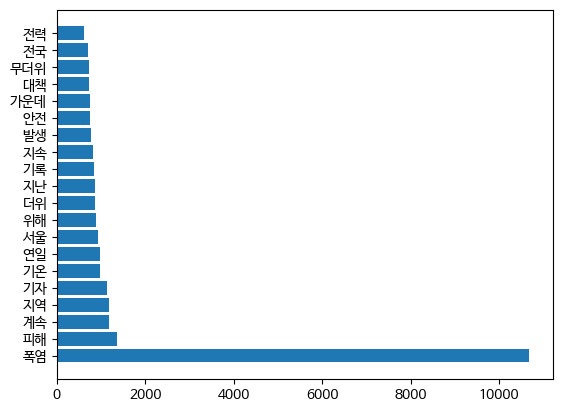

In [ ]:
# matplotlib.pypot 모듈 불러오기
# 가장 많이 출현한 20개 단어를 가로 막대 그래프로 나타냄
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

plt.barh(sorted_df.head(20)["단어"], sorted_df.head(20)["빈도"])
plt.show()

## TF-IDF

In [ ]:
# sklearn.feature_extraction.text 의 TfidfVectorizer 불러오기
# TfidfVectorizer의 fit() 함수에 corpus 적용 후 tfidfv 변수에 할당
# 배열로 결과 확인
# vocabulary_ 로 단어별 인덱스 확인
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['you know I want your love',
          'I like you',
          'what should I do' ]

tfidfv = TfidfVectorizer().fit(corpus)

print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


### < 과제 >

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidfv2 = TfidfVectorizer(max_features=1000,
                          tokenizer=get_nouns).fit_transform(df['본문'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
print(tfidfv2[0].toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.2119017  0.29488185 0.
  0.         0.         0.         0.         0.         0.
  0.24681254 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   